# Session 03 - Notes: Dash Plotly Course

We'll dive into Dash **graph** component, then play around the plotly dash graph component (click, hover, ... to generate change)

Schafer's 4 C's of data visualization:
* Clear:
* Clean: Unpoluted, thorough, right type of chart, color choice
* Concise: Not labels on everything that's too verbose.
* Captivating: Does it capture attention, does it tell a story?

"Your audience should be able to get the message within 5 seconds of seeing the visualization."

## Graph components

Plotly has 100+ figures and a comprehensive list of attributes to configure the figures to our liking.

https://plotly.com/python-api-reference/plotly.express.html

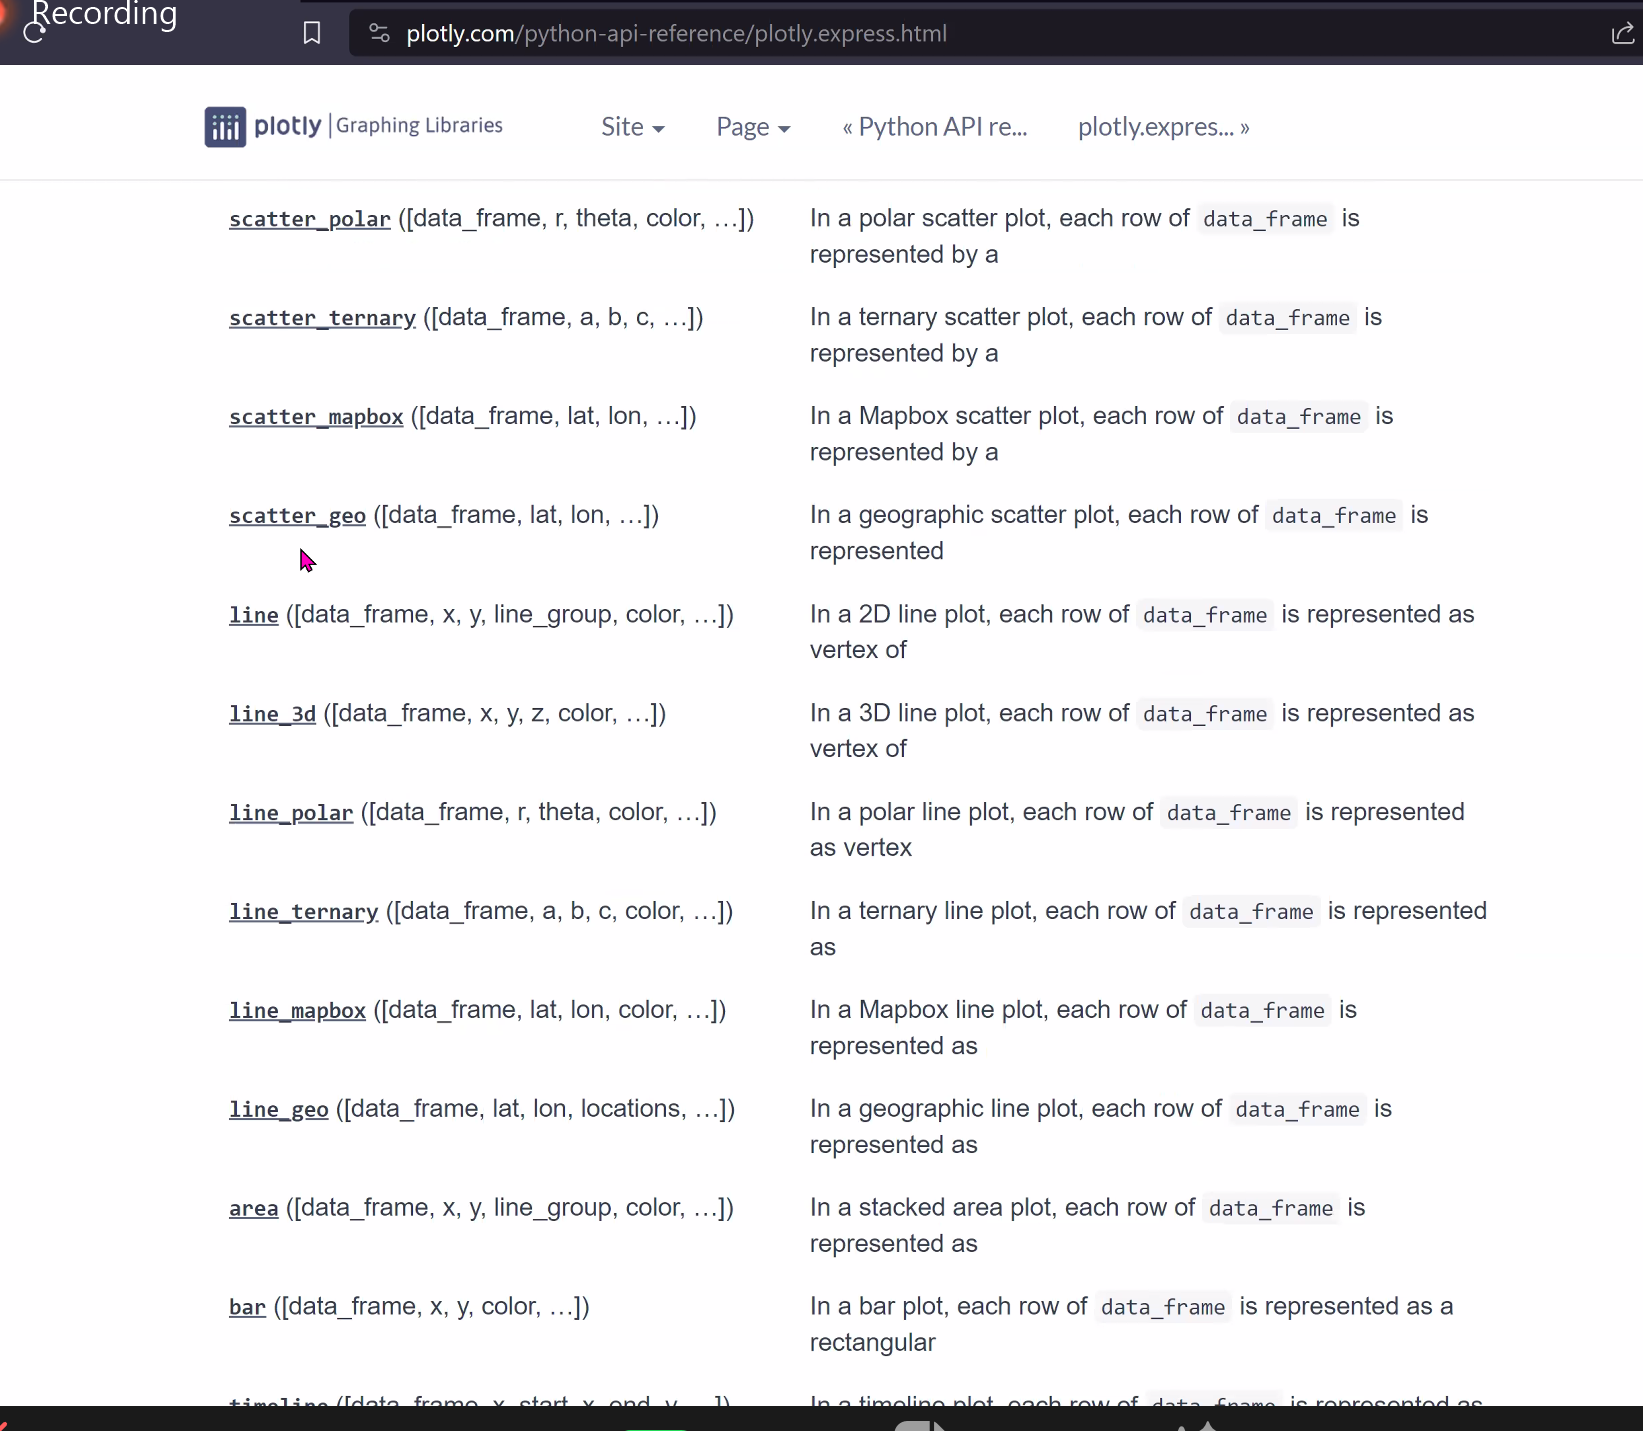

In [4]:
# Import packages
# import micropip
# await micropip.install("dash_ag_grid")

from dash import Dash, html, dash_table, dcc, callback, Output, Input
import pandas as pd
import plotly.express as px
import dash_ag_grid as dag

# Incorporate data
df = pd.read_csv(
    "https://raw.githubusercontent.com/plotly/datasets/master/gapminder2007.csv"
)

# Plotly graphs
fig = px.histogram(df, x="continent", y="pop", histfunc="avg")

# Initialize the app
app = Dash(__name__)

# App layout
app.layout = html.Div(
    [
        html.Div(children="My First App with Data, Graph, and Controls"),
        html.Hr(),
        dcc.RadioItems(
            options=["pop", "lifeExp", "gdpPercap"],
            value="lifeExp",
            id="column-options",
        ),
        dag.AgGrid(
            id="grid",
            rowData=df.to_dict("records"),
            columnDefs=[{"field": i} for i in df.columns],
        ),
        dcc.Graph(figure=fig, id="graph1"),
    ]
)


# Add controls to build the interaction
@callback(
    Output(component_id="graph1", component_property="figure"),
    Input(component_id="column-options", component_property="value"),
)
def update_graph(col_chosen):
    dff = df[
        df.country.isin(
            [
                "Albania",
                "Romania",
                "Iran",
                "India",
                "Algeria",
                "Egypt",
                "Australia",
                "Canada",
                "Mexico",
            ]
        )
    ]
    fig = px.histogram(dff, x="continent", y=col_chosen, histfunc="avg")
    return fig


# Run the app
if __name__ == "__main__":
    app.run(debug=True)

Add the attribute to the histogram to make each country receive its own shape. (it's `pattern_shape`)

https://plotly.com/python-api-reference/generated/plotly.express.histogram.html#plotly.express.histogram


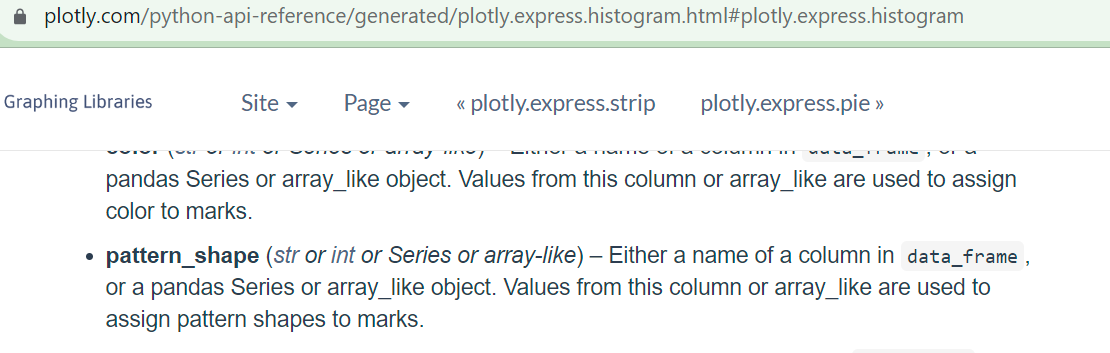


Dash App is STATELESS. Modifications on the dataframe are only for you. A global variable that lives outside of a callback function, outside of the layout. DO NOT MODIFY THE GLOBAL VARIABLE INSIDE THE CALLBACK FUNCTION. Define a new variable instead

In [5]:
# Plotly graphs
fig = px.histogram(df, x="continent", y="pop", histfunc="avg")

# Initialize the app
app = Dash(__name__)

# App layout
app.layout = html.Div(
    [
        html.Div(children="My First App with Data, Graph, and Controls"),
        html.Hr(),
        dcc.RadioItems(
            options=["pop", "lifeExp", "gdpPercap"],
            value="lifeExp",
            id="column-options",
        ),
        dag.AgGrid(
            id="grid",
            rowData=df.to_dict("records"),
            columnDefs=[{"field": i} for i in df.columns],
        ),
        dcc.Graph(figure=fig, id="graph1"),
    ]
)


# Add controls to build the interaction
@callback(
    Output(component_id="graph1", component_property="figure"),
    Input(component_id="column-options", component_property="value"),
)
def update_graph(col_chosen):
    dff = df[
        df.country.isin(
            [
                "Albania",
                "Romania",
                "Iran",
                "India",
                "Algeria",
                "Egypt",
                "Australia",
                "Canada",
                "Mexico",
            ]
        )
    ]
    fig = px.histogram(
        dff, x="continent", y=col_chosen, histfunc="avg", pattern_shape="country"
    )
    return fig


# Run the app
if __name__ == "__main__":
    app.run(debug=True)

Remove everything inside the callback function and add this fig = px.scatter(df, x='gdpPercap', y='lifeExp')`

What scatterplot attribute can we use to limit the x axis between 10k to 40k?

It's `range_x`, it takes in a list
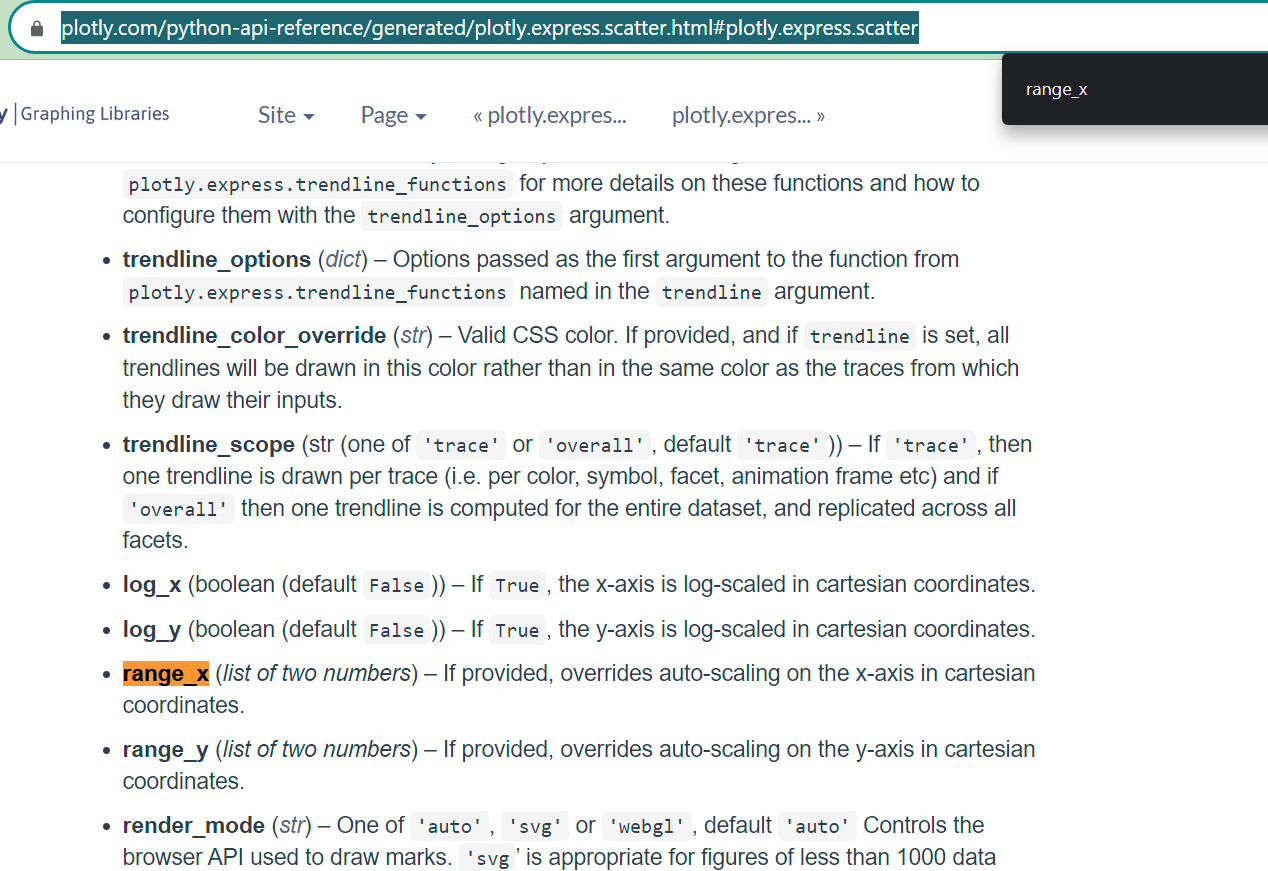

In [9]:
from dash import Dash, html, dash_table, dcc, callback, Output, Input
import pandas as pd
import plotly.express as px
import dash_ag_grid as dag

# Incorporate data
df = pd.read_csv(
    "https://raw.githubusercontent.com/plotly/datasets/master/gapminder2007.csv"
)

# Plotly graphs
fig = px.histogram(df, x="continent", y="pop", histfunc="avg")

# Initialize the app
app = Dash(__name__)

# App layout
app.layout = html.Div(
    [
        html.Div(children="My First App with Data, Graph, and Controls"),
        html.Hr(),
        dcc.RadioItems(
            options=["pop", "lifeExp", "gdpPercap"],
            value="lifeExp",
            id="column-options",
        ),
        dag.AgGrid(
            id="grid",
            rowData=df.to_dict("records"),
            columnDefs=[{"field": i} for i in df.columns],
        ),
        dcc.Graph(figure=fig, id="graph1"),
    ]
)


# Add controls to build the interaction
@callback(
    Output(component_id="graph1", component_property="figure"),
    Input(component_id="column-options", component_property="value"),
)
def update_graph(col_chosen):
    fig = px.scatter(df, x="gdpPercap", y="lifeExp", range_x=[10000, 40000])
    return fig


# Run the app
if __name__ == "__main__":
    app.run(debug=True)

Even more attributes that what you have in Plotly express! There are 100s in there. For extra functionality:

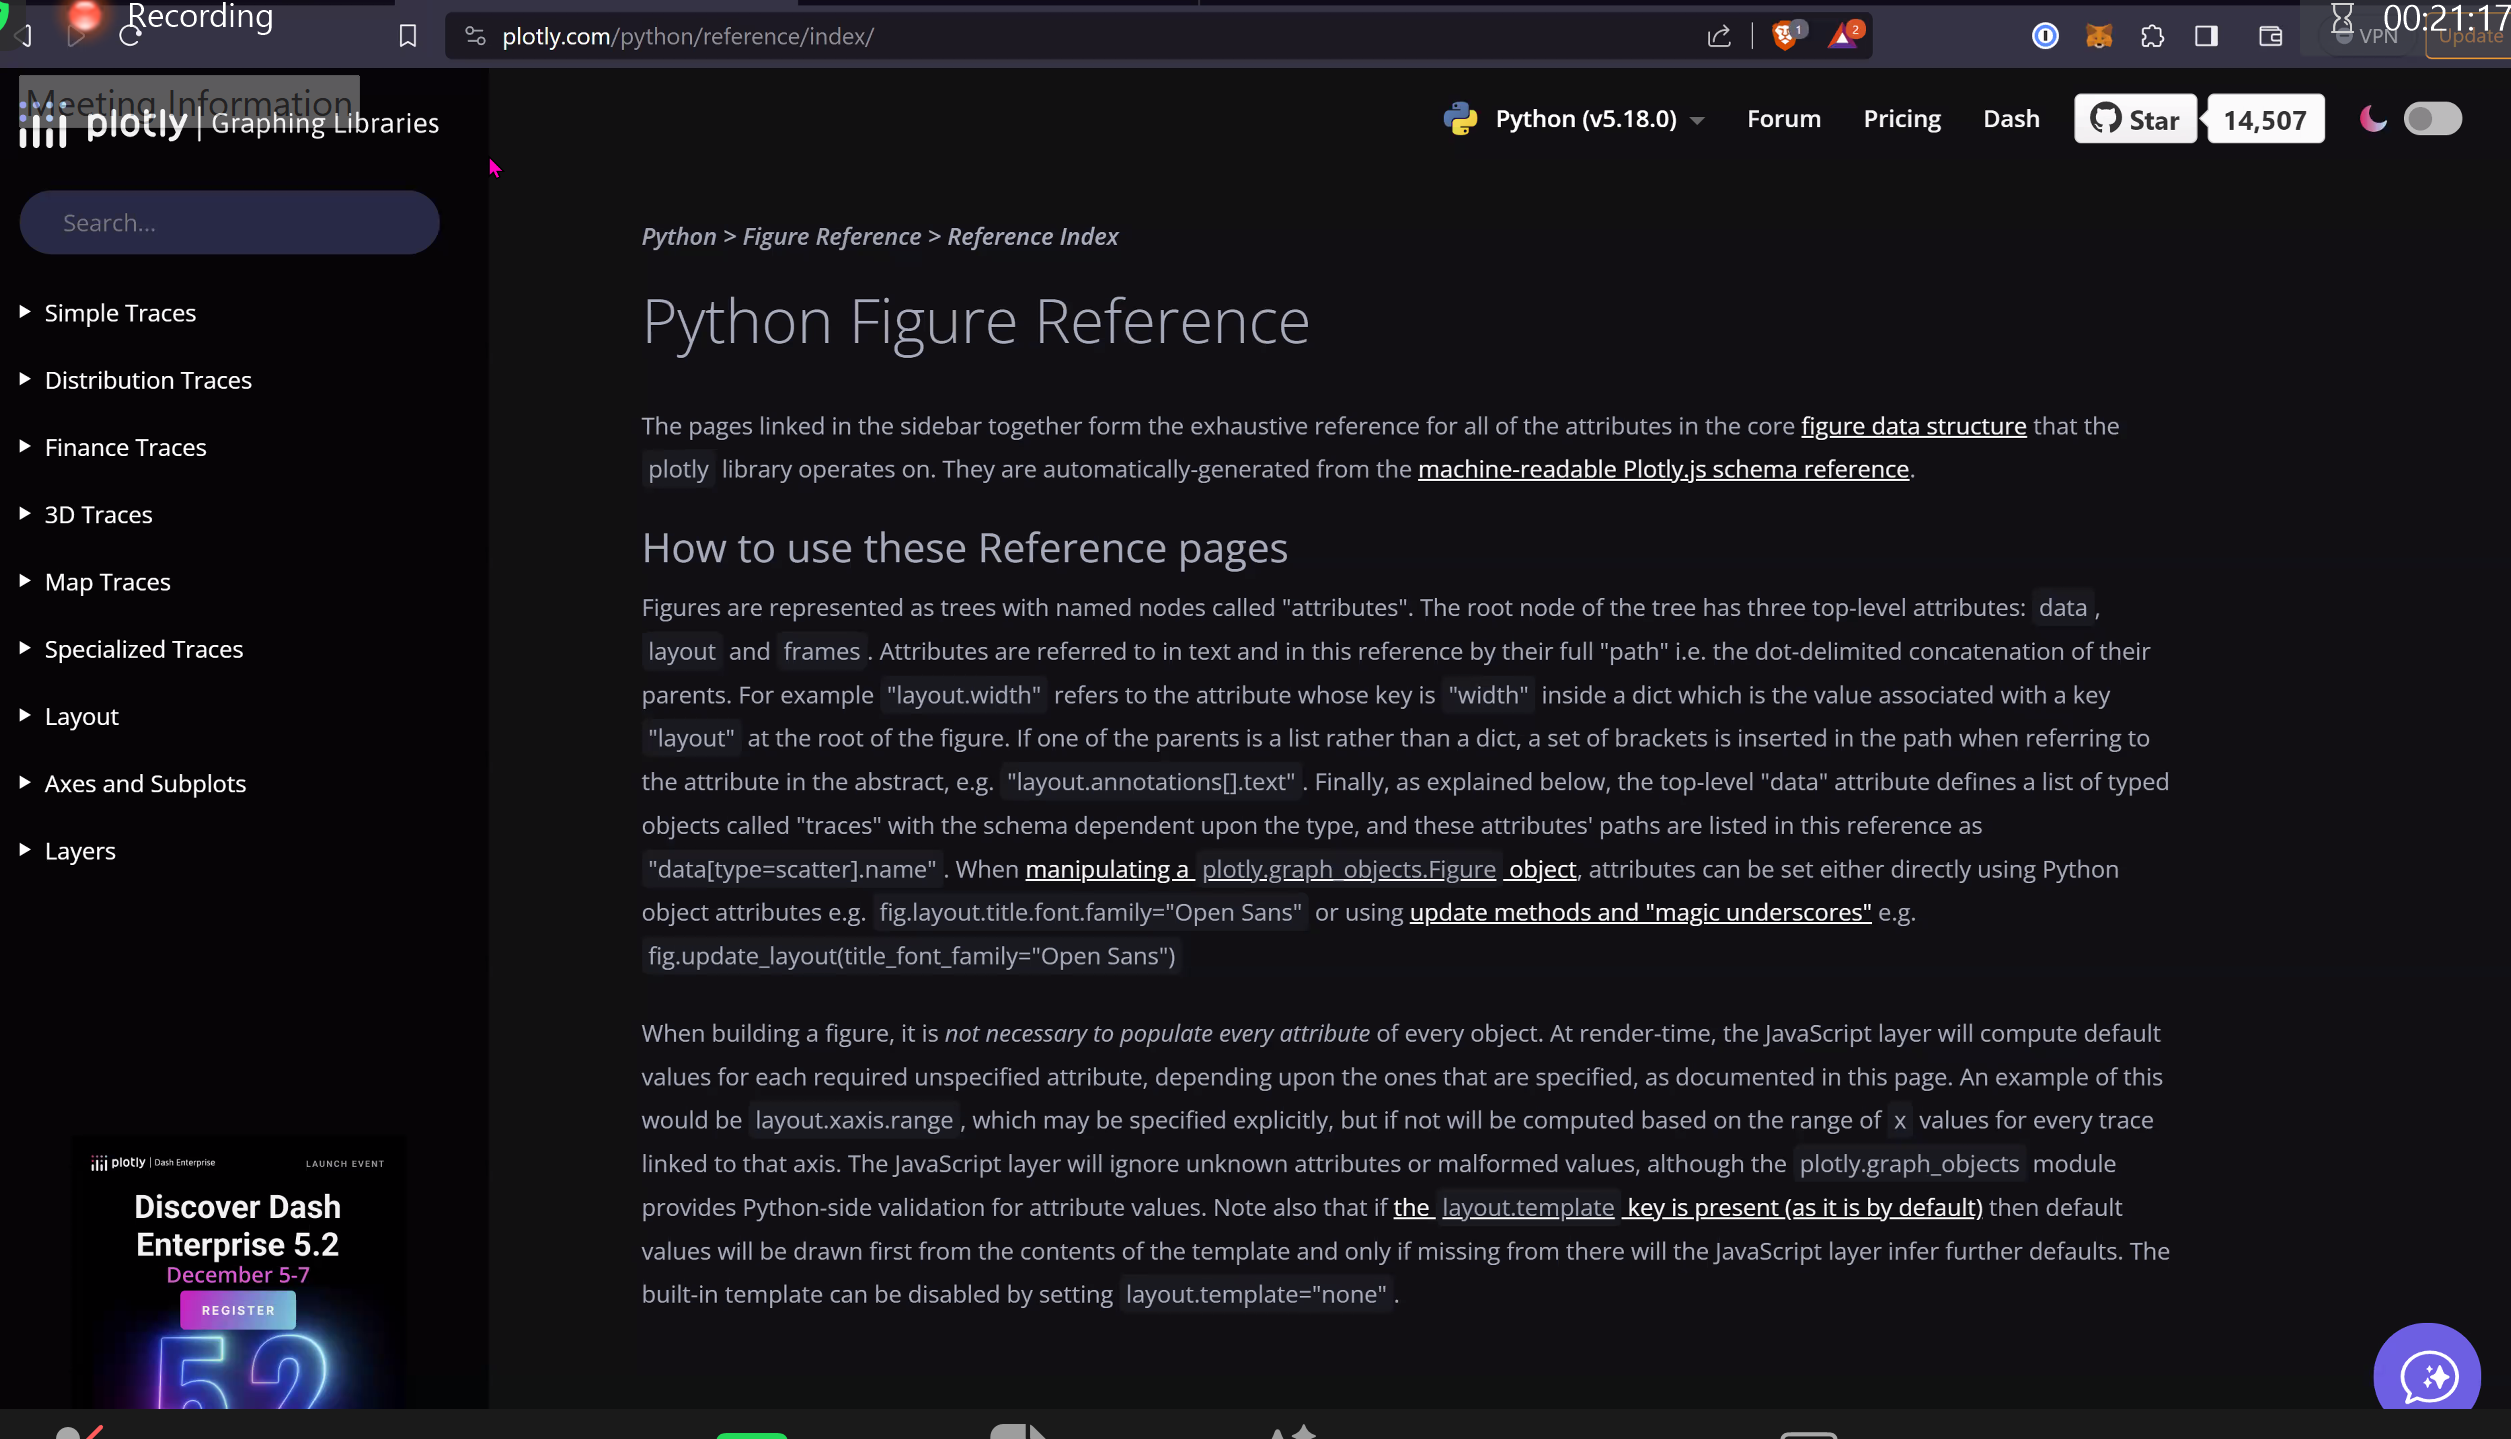

That list is a lot richer. E.g. marker size can be changed here, not on plotly express which is the high-level reference. Also not show legends

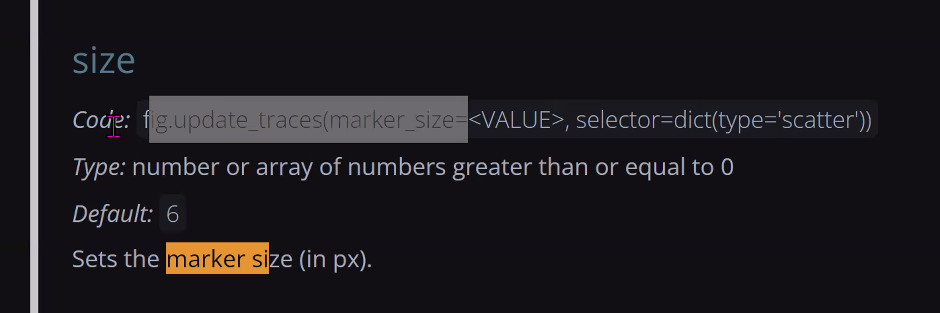

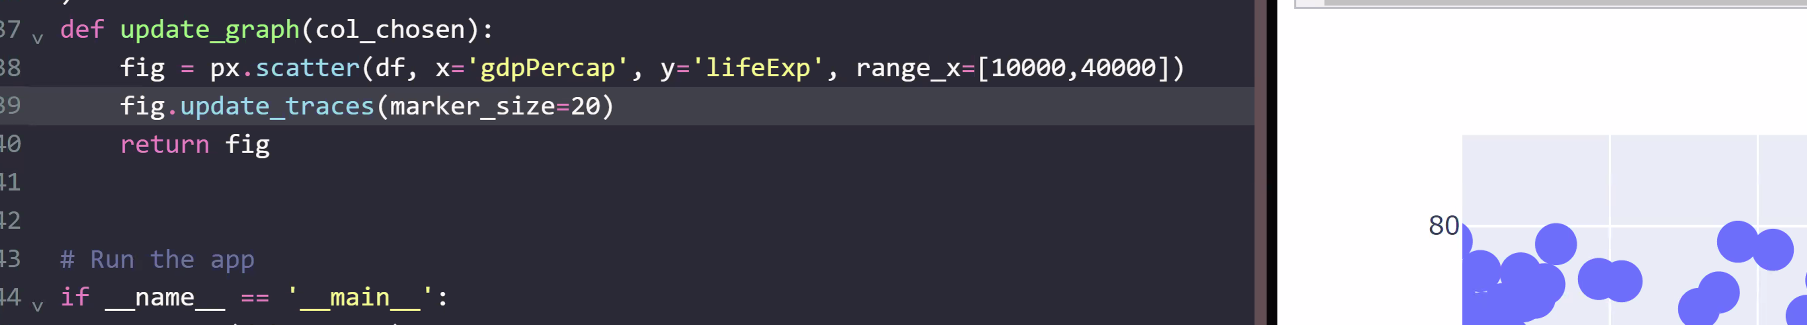

Boolean

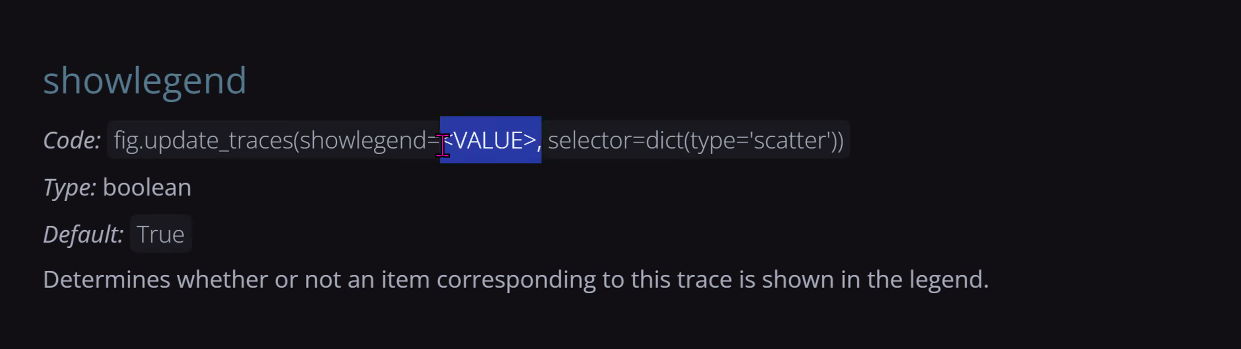

In [ ]:
# Plotly graphs
fig = px.histogram(df, x="continent", y="pop", histfunc="avg")

# Initialize the app
app = Dash(__name__)

# App layout
app.layout = html.Div(
    [
        html.Div(children="My First App with Data, Graph, and Controls"),
        html.Hr(),
        dcc.RadioItems(
            options=["pop", "lifeExp", "gdpPercap"],
            value="lifeExp",
            id="column-options",
        ),
        dag.AgGrid(
            id="grid",
            rowData=df.to_dict("records"),
            columnDefs=[{"field": i} for i in df.columns],
        ),
        dcc.Graph(figure=fig, id="graph1"),
    ]
)


# Add controls to build the interaction
@callback(
    Output(component_id="graph1", component_property="figure"),
    Input(component_id="column-options", component_property="value"),
)
def update_graph(col_chosen):
    fig = px.scatter(
        df, x="gdpPercap", y="lifeExp", range_x=[10000, 40000], color="continent"
    )
    return fig


# Run the app
if __name__ == "__main__":
    app.run(debug=True)

Also look at the layout, font size for instance

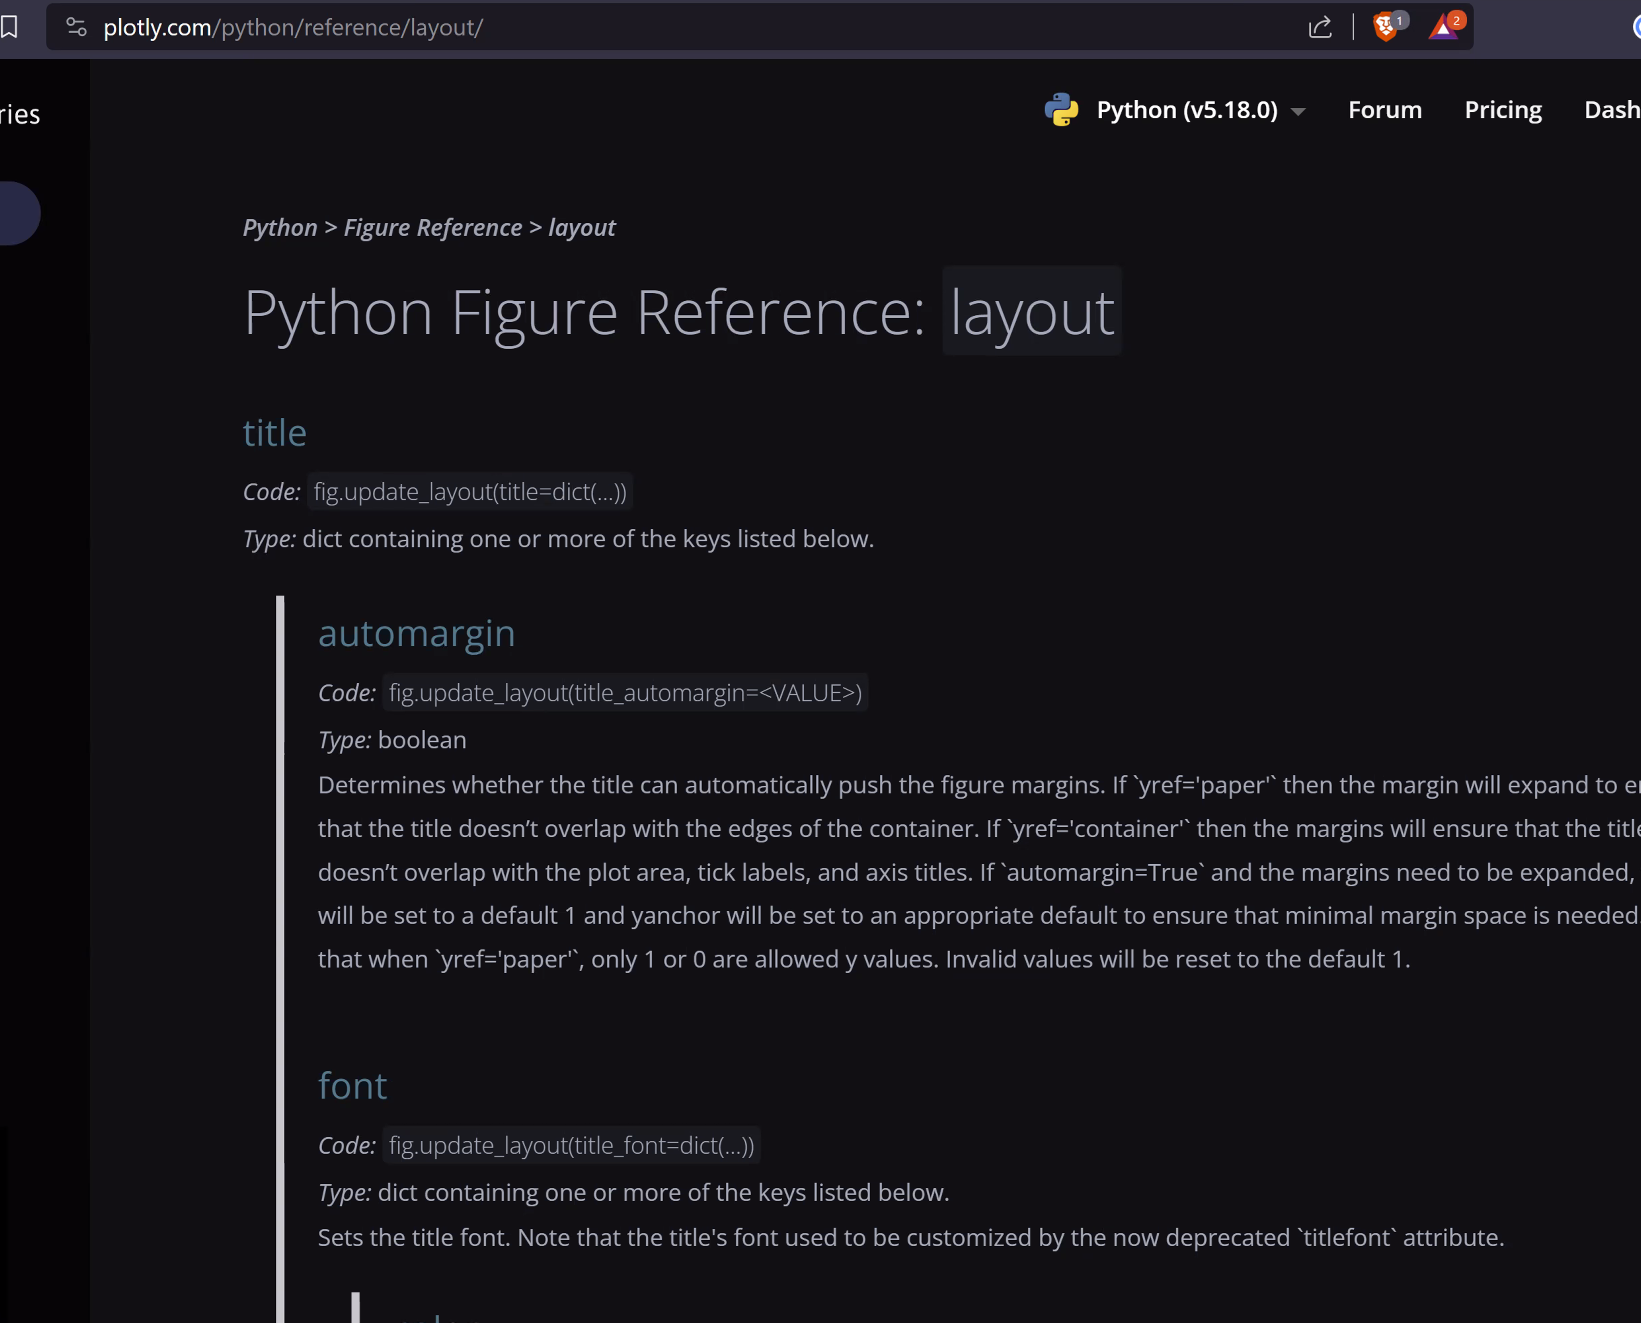

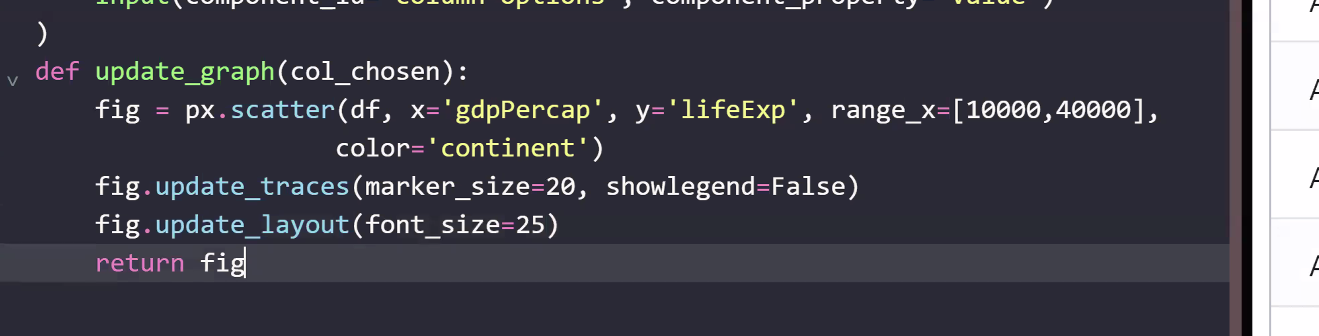

## DCC Graph

There are many properties to DCC graph

Common are hoverData, clickData, and selectedData...

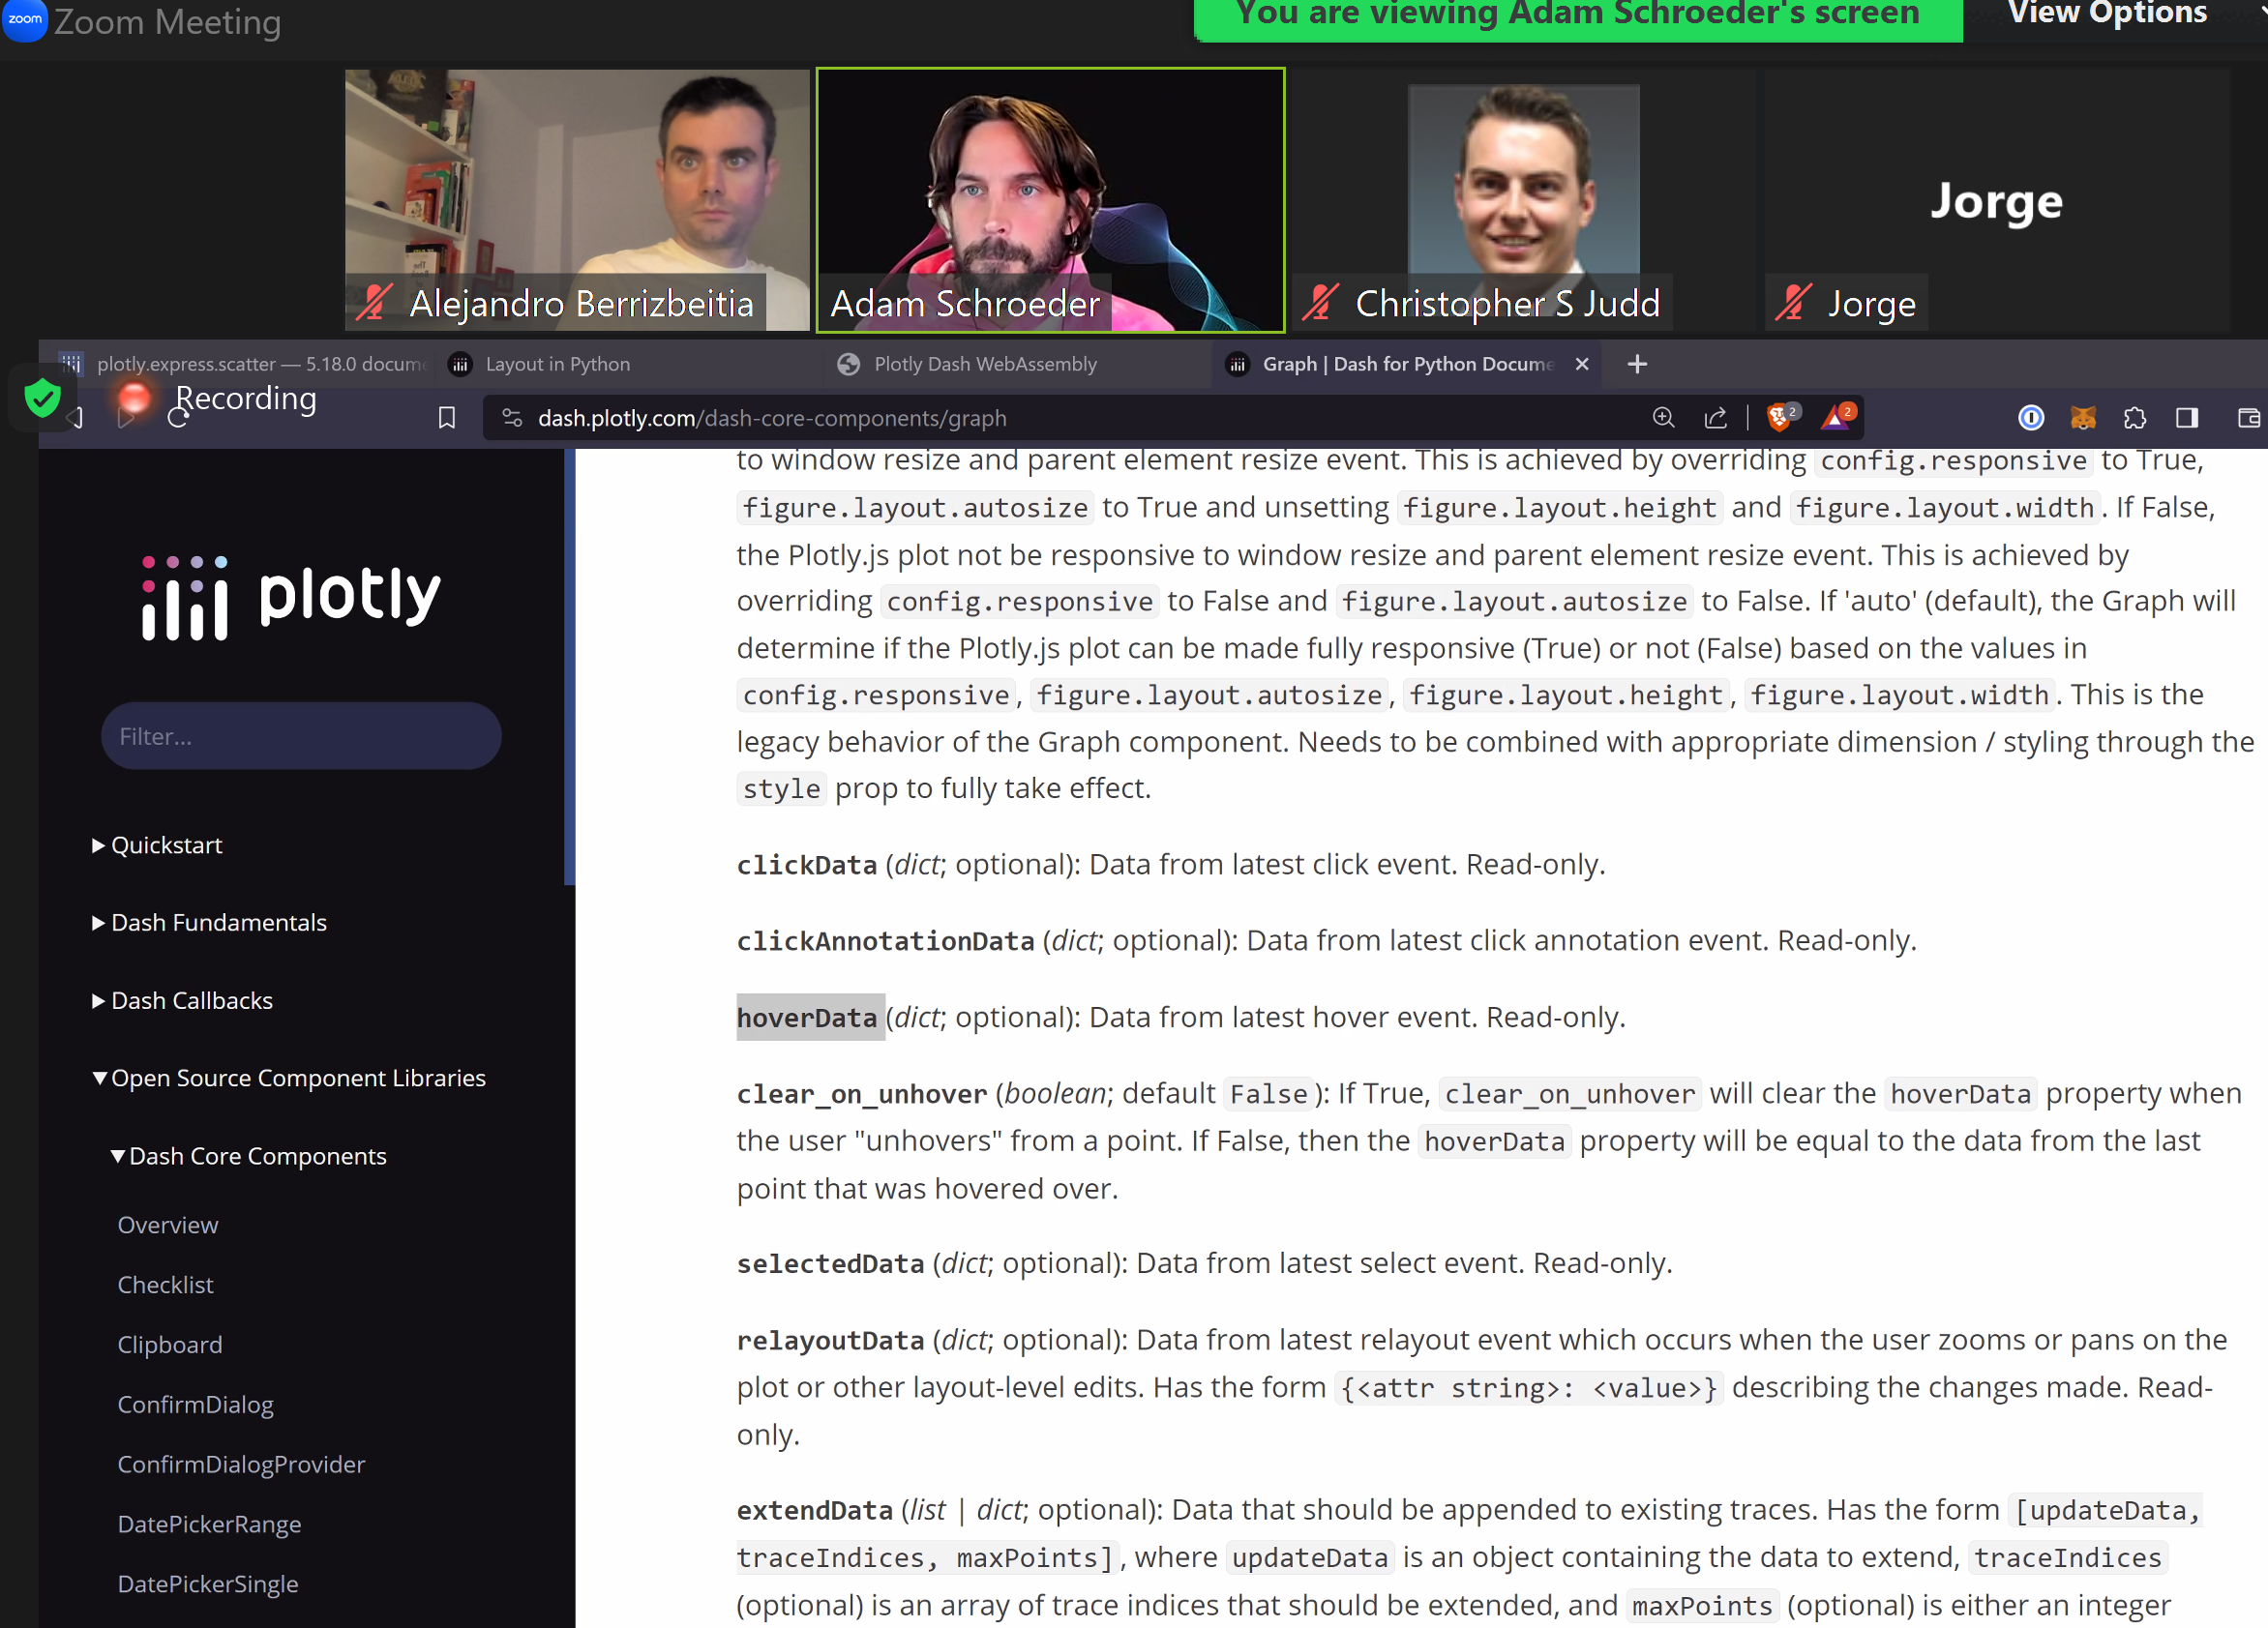

Check out how the hover data updates when you over over the plot:

In [10]:
from dash import Dash, html, dcc, Input, Output, callback, no_update
import dash_ag_grid as dag
import plotly.express as px
import pandas as pd

df = pd.read_csv(
    "https://raw.githubusercontent.com/plotly/datasets/master/gapminder2007.csv"
)

columnDefs = [
    {"field": "country"},
    {"field": "pop"},
    {"field": "continent"},
    {"field": "lifeExp"},
    {"field": "gdpPercap"},
]

grid = dag.AgGrid(
    id="tabular-data",
    rowData=df.to_dict("records"),
    columnDefs=columnDefs,
)

# Initialize the app
app = Dash(__name__)

# App layout
app.layout = html.Div(
    [
        html.Div(children="My First App with Data, Graph, and Controls"),
        html.Hr(),
        dcc.RadioItems(
            options=["pop", "lifeExp", "gdpPercap"], value="lifeExp", id="radio-buton"
        ),
        grid,
        dcc.Graph(figure={}, id="my-scatter"),
    ]
)


# Add controls to build the interaction
@callback(
    Output(component_id="my-scatter", component_property="figure"),
    Input(component_id="radio-buton", component_property="value"),
)
def update_graph(yaxis_chosen):
    fig = px.scatter(df, x="gdpPercap", y=yaxis_chosen)
    return fig


@callback(
    Output(component_id="tabular-data", component_property="rowData"),
    Output(component_id="tabular-data", component_property="columnDefs"),
    Input(component_id="my-scatter", component_property="hoverData"),
)
def update_table(hover_data):
    print(hover_data)
    return no_update, no_update


# Run the app
if __name__ == "__main__":
    app.run(debug=True)

None
None
None
None
{'points': [{'curveNumber': 0, 'pointNumber': 42, 'pointIndex': 42, 'x': 690.8055759, 'y': 52.947, 'bbox': {'x0': 135.04, 'x1': 141.04, 'y0': 766.54, 'y1': 772.54}}]}
{'points': [{'curveNumber': 0, 'pointNumber': 79, 'pointIndex': 79, 'x': 1042.581557, 'y': 54.467, 'bbox': {'x0': 140.18, 'x1': 146.18, 'y0': 756.94, 'y1': 762.94}}]}
{'points': [{'curveNumber': 0, 'pointNumber': 10, 'pointIndex': 10, 'x': 1441.284873, 'y': 56.728, 'bbox': {'x0': 146, 'x1': 152, 'y0': 742.66, 'y1': 748.66}}]}
{'points': [{'curveNumber': 0, 'pointNumber': 18, 'pointIndex': 18, 'x': 1713.778686, 'y': 59.723, 'bbox': {'x0': 149.98000000000002, 'x1': 155.98000000000002, 'y0': 723.75, 'y1': 729.75}}]}
{'points': [{'curveNumber': 0, 'pointNumber': 41, 'pointIndex': 41, 'x': 641.3695236000001, 'y': 58.04, 'bbox': {'x0': 134.31, 'x1': 140.31, 'y0': 734.38, 'y1': 740.38}}]}
None


Likewise when you click

In [11]:
from dash import Dash, html, dcc, Input, Output, callback, no_update
import dash_ag_grid as dag
import plotly.express as px
import pandas as pd

df = pd.read_csv(
    "https://raw.githubusercontent.com/plotly/datasets/master/gapminder2007.csv"
)

columnDefs = [
    {"field": "country"},
    {"field": "pop"},
    {"field": "continent"},
    {"field": "lifeExp"},
    {"field": "gdpPercap"},
]

grid = dag.AgGrid(
    id="tabular-data",
    rowData=df.to_dict("records"),
    columnDefs=columnDefs,
)

# Initialize the app
app = Dash(__name__)

# App layout
app.layout = html.Div(
    [
        html.Div(children="My First App with Data, Graph, and Controls"),
        html.Hr(),
        dcc.RadioItems(
            options=["pop", "lifeExp", "gdpPercap"], value="lifeExp", id="radio-buton"
        ),
        grid,
        dcc.Graph(figure={}, id="my-scatter"),
    ]
)


# Add controls to build the interaction
@callback(
    Output(component_id="my-scatter", component_property="figure"),
    Input(component_id="radio-buton", component_property="value"),
)
def update_graph(yaxis_chosen):
    fig = px.scatter(df, x="gdpPercap", y=yaxis_chosen)
    return fig


@callback(
    Output(component_id="tabular-data", component_property="rowData"),
    Output(component_id="tabular-data", component_property="columnDefs"),
    Input(component_id="my-scatter", component_property="clickData"),
)
def update_table(clickData):
    print(clickData)
    return no_update, no_update


# Run the app
if __name__ == "__main__":
    app.run(debug=True)

None
None
None
None
None
{'points': [{'curveNumber': 0, 'pointNumber': 139, 'pointIndex': 139, 'x': 2280.769906, 'y': 62.698, 'bbox': {'x0': 158.26, 'x1': 164.26, 'y0': 704.96, 'y1': 710.96}}]}
None
{'points': [{'curveNumber': 0, 'pointNumber': 119, 'pointIndex': 119, 'x': 3970.095407, 'y': 72.396, 'bbox': {'x0': 182.94, 'x1': 188.94, 'y0': 643.71, 'y1': 649.71}}]}


Example of how to take the hover data and use it to only show de hovered over country on the Grid, not all the countries

In [14]:
from dash import Dash, html, dcc, Input, Output, callback, no_update
import dash_ag_grid as dag
import plotly.express as px
import pandas as pd

df = pd.read_csv(
    "https://raw.githubusercontent.com/plotly/datasets/master/gapminder2007.csv"
)

columnDefs = [
    {"field": "country"},
    {"field": "pop"},
    {"field": "continent"},
    {"field": "lifeExp"},
    {"field": "gdpPercap"},
]

grid = dag.AgGrid(
    id="tabular-data",
    rowData=df.to_dict("records"),
    columnDefs=columnDefs,
)

# Initialize the app
app = Dash(__name__)

# App layout
app.layout = html.Div(
    [
        html.Div(children="My First App with Data, Graph, and Controls"),
        html.Hr(),
        dcc.RadioItems(
            options=["pop", "lifeExp", "gdpPercap"], value="lifeExp", id="radio-buton"
        ),
        grid,
        dcc.Graph(figure={}, id="my-scatter"),
    ]
)


# Add controls to build the interaction
@callback(
    Output(component_id="my-scatter", component_property="figure"),
    Input(component_id="radio-buton", component_property="value"),
)
def update_graph(yaxis_chosen):
    fig = px.scatter(df, x="gdpPercap", y=yaxis_chosen)
    return fig


@callback(
    Output(component_id="tabular-data", component_property="rowData"),
    Output(component_id="tabular-data", component_property="columnDefs"),
    Input(component_id="my-scatter", component_property="hoverData"),
)
def update_table(hover_data):
    print(hover_data)
    x_axis_data = hover_data["points"][0]["x"]
    print(x_axis_data)
    dff = df[df.gdpPercap == x_axis_data]
    print(dff)
    return dff.to_dict("records"), columnDefs
    # return no_update, no_update # This means do not update anything


# Run the app
if __name__ == "__main__":
    app.run(debug=True)

None
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
TypeError: 'NoneType' object is not subscriptable

None
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
TypeError: 'NoneType' object is not subscriptable

None
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
TypeError: 'NoneType' object is not subscriptable

None
None
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
TypeError: 'NoneType' object is not subscriptable

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
TypeError: 

Remember:

* High-level interface is the plotly express library
* For higher level of customization go to the Figure Reference, layout session
* Even more customization? Look at Dash Mantine